In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
url = 'https://docs.google.com/spreadsheets/d/1nvbMXbLLjQDSz3URI1lfJxT5Scghm_ar_lOiTE_K0XE/export?format=csv'
df = pd.read_csv(url)

In [5]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [22]:
df.shape

(78600, 15)

In [23]:
df.isnull().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
cluster              0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

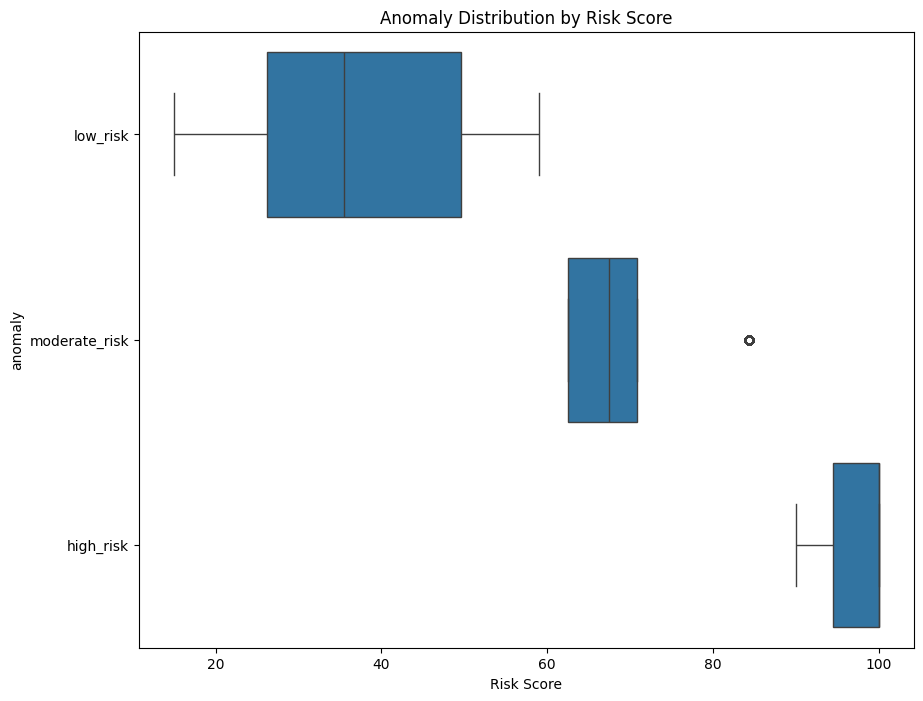

In [7]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='risk_score', y='anomaly', data=df)

plt.title('Anomaly Distribution by Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('anomaly')

plt.show()

<Axes: xlabel='login_frequency', ylabel='session_duration'>

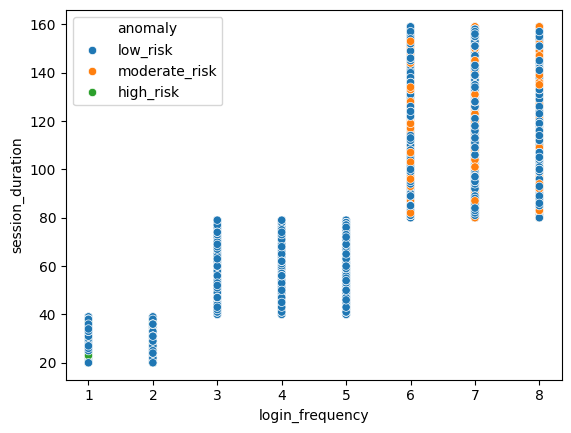

In [8]:
sns.scatterplot(x='login_frequency', y='session_duration', data=df, hue='anomaly')

<Axes: xlabel='login_frequency', ylabel='session_duration'>

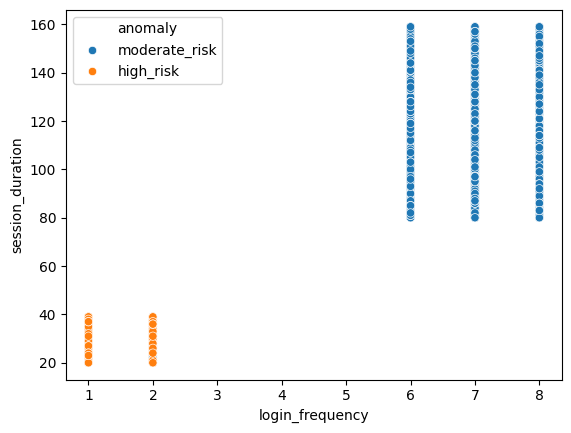

In [9]:
anomaly_filter = df['anomaly'].isin(['moderate_risk', 'high_risk'])
df_filtered = df[anomaly_filter]

sns.scatterplot(x='login_frequency', y='session_duration', data=df_filtered, hue='anomaly')

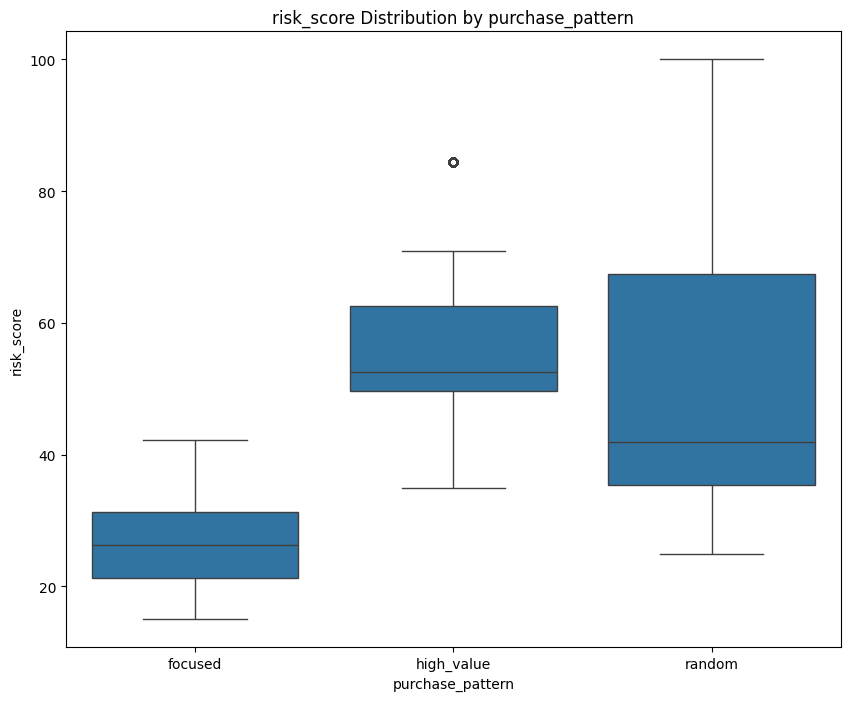

In [10]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='purchase_pattern', y='risk_score', data=df)


plt.title('risk_score Distribution by purchase_pattern')
plt.xlabel('purchase_pattern')
plt.ylabel('risk_score')


plt.show()

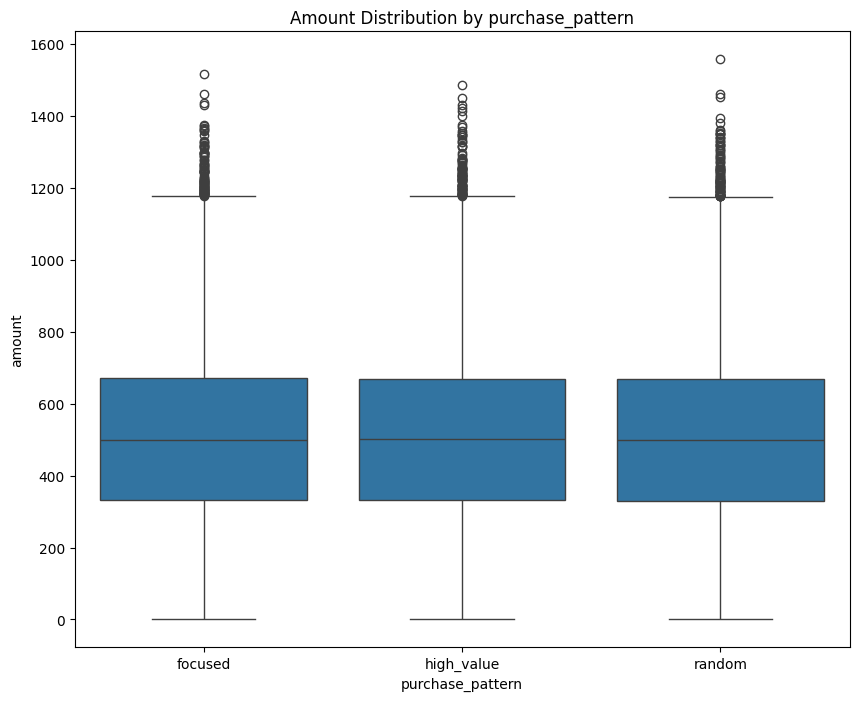

In [11]:
plt.figure(figsize=(10, 8))


sns.boxplot(x='purchase_pattern', y='amount', data=df)


plt.title('Amount Distribution by purchase_pattern')
plt.xlabel('purchase_pattern')
plt.ylabel('amount')


plt.show()

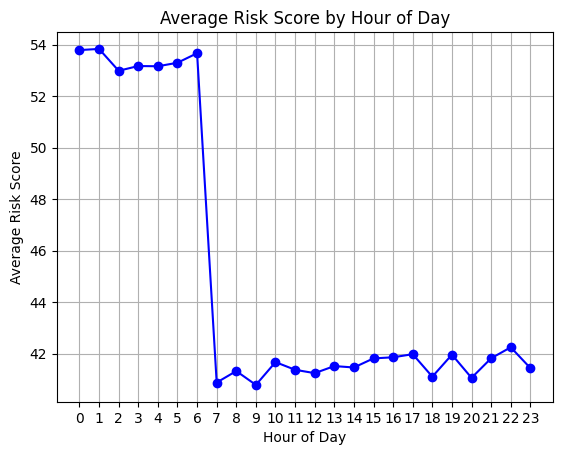

In [12]:
df.groupby('hour_of_day')['risk_score'].mean().plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Average Risk Score by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Risk Score')
plt.xticks(range(24))
plt.grid(True)
plt.show()

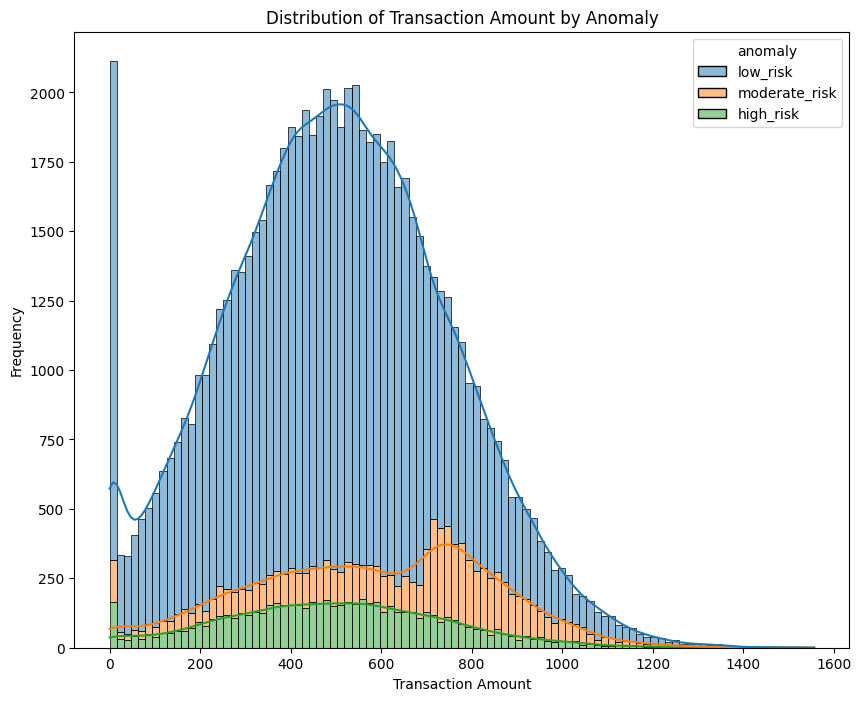

In [13]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x='amount', hue='anomaly', multiple='stack', kde=True)


plt.title('Distribution of Transaction Amount by Anomaly')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')


plt.show()

In [14]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [24]:
plt.figure(figsize=(10, 8))

pivot_table = df.pivot_table(index='purchase_pattern', columns='age_group', values='amount', aggfunc='mean')
pivot_table

age_group,established,new,veteran
purchase_pattern,,,
focused,502.665637,NaN,NaN
high_value,NaN,NaN,502.327846
random,NaN,502.734231,NaN


<Figure size 1000x800 with 0 Axes>

In [25]:
df.groupby('ip_prefix').agg({'timestamp':'count', 'amount':'mean'})

,timestamp,amount
ip_prefix,,
10.000,15715,503.412122
172.000,15659,502.716009
172.160,15911,500.668762
192.000,15622,506.799167
192.168,15693,499.323177


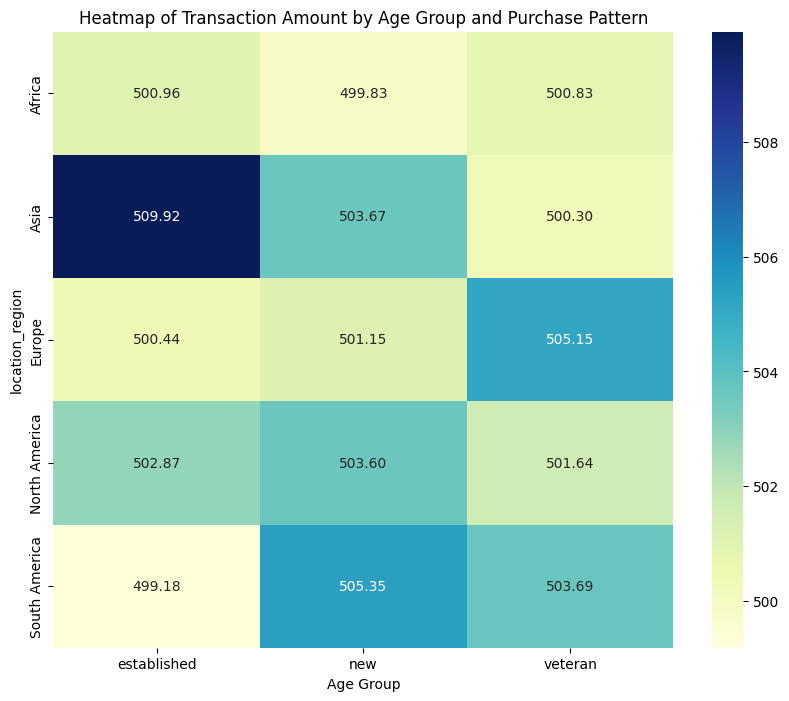

In [26]:
plt.figure(figsize=(10, 8))


pivot_table = df.pivot_table(index='location_region', columns='age_group', values='amount', aggfunc='mean')


sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")

plt.title('Heatmap of Transaction Amount by Age Group and Purchase Pattern')
plt.xlabel('Age Group')
plt.ylabel('location_region')


plt.show()

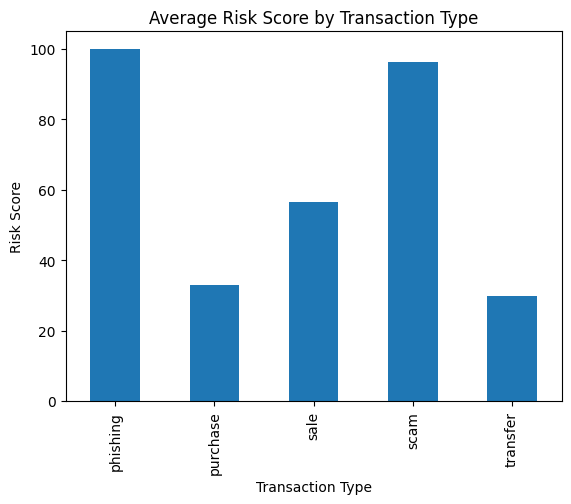

In [16]:
df.groupby('transaction_type')['risk_score'].mean().plot(kind='bar')
plt.ylabel('Risk Score')
plt.xlabel('Transaction Type')
plt.title('Average Risk Score by Transaction Type')
plt.show()

In [19]:


from apyori import apriori

basket = df[['anomaly', 'transaction_type', 'purchase_pattern']].values.tolist()


min_support = 0.1
min_confidence = 0.5
min_lift = 1.2

rules = apriori(transactions=basket, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=2)

results = list(rules)

for item in results:

    # First item in the tuple is the rule
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # Second item is the support
    print("Support: " + str(item[1]))

    # Third item is the list of confidence values
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")


Rule: low_risk -> focused
Support: 0.33120865139949107
Confidence: 1.0
Lift: 1.2379122436765677
Rule: focused -> purchase
Support: 0.23254452926208652
Confidence: 0.7021088618292168
Lift: 2.2127408396061123
Rule: high_value -> moderate_risk
Support: 0.10454198473282443
Confidence: 0.954244570897689
Lift: 2.8386807687744438
Rule: high_value -> sale
Support: 0.2360941475826972
Confidence: 0.70233139050791
Lift: 2.204602527712529
Rule: low_risk -> purchase
Support: 0.31730279898218827
Confidence: 1.0
Lift: 1.2379122436765677
Rule: transfer -> low_risk
Support: 0.2814885496183206
Confidence: 1.0
Lift: 1.2379122436765677
Rule: moderate_risk -> sale
Support: 0.10955470737913486
Confidence: 1.0
Lift: 3.1389776357827475
Rule: low_risk -> focused
Support: 0.23254452926208652
Confidence: 0.7021088618292168
Lift: 2.2127408396061123
Rule: sale -> high_value
Support: 0.13155216284987278
Confidence: 0.56797583081571
Lift: 1.7828634305956392
Rule: transfer -> high_value
Support: 0.10006361323155216
C

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

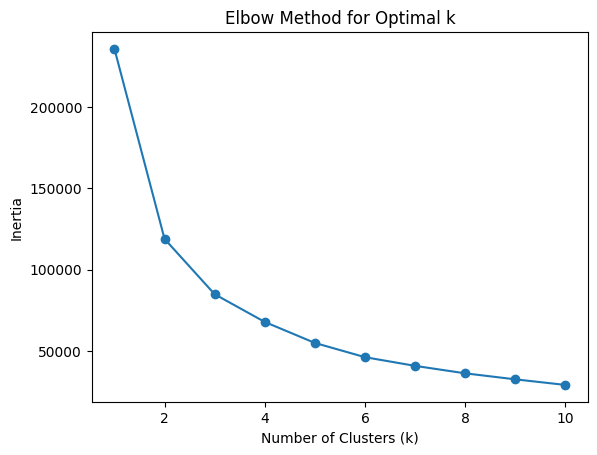

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


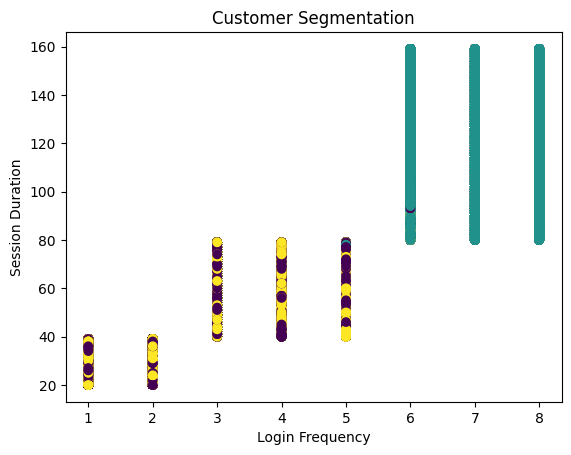

Cluster 0:
       login_frequency  session_duration        amount
count     25526.000000      25526.000000  25526.000000
mean          2.757894         44.502233    707.101199
std           1.424946         17.644887    151.585359
min           1.000000         20.000000    505.980413
25%           2.000000         29.000000    587.734364
50%           3.000000         40.000000    675.435819
75%           4.000000         59.000000    794.241693
max           8.000000        113.000000   1557.150905


Cluster 1:
       login_frequency  session_duration        amount
count     26463.000000      26463.000000  26463.000000
mean          6.992934        119.379889    501.688519
std           0.828724         23.340859    242.137902
min           5.000000         73.000000      0.010000
25%           6.000000         99.000000    333.580907
50%           7.000000        119.000000    500.938726
75%           8.000000        140.000000    665.792879
max           8.000000        159.000000 

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['login_frequency', 'session_duration', 'amount']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters (example using scatter plot)
plt.scatter(df['login_frequency'], df['session_duration'], c=df['cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Login Frequency')
plt.ylabel('Session Duration')
plt.show()

# Analyze the characteristics of each cluster
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data[features].describe())
    print("\n")